In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Dostop do datoteke
file_path = 'PrometneNesreče.csv'
data = pd.read_csv(file_path)

C:\Users\Hana\AppData\Local\Temp\ipykernel_7676\3269022550.py:3: DtypeWarning: Columns (31,32,33,34,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


# Število nesreč po mesecih

In [5]:
# Pretvori stolpec 'NastanekDatumCas' v pravilen format (vsaka vrednost bo pandas objekt za datum in čas)
data['NastanekDatumCas'] = pd.to_datetime(data['NastanekDatumCas'], format='ISO8601', errors='coerce')

# Za vsak vnos pridobi, kateri mesec je bil
months = data['NastanekDatumCas'].dt.month

# Preštej število nesreč za vsak mesec
accidents_per_month = months.value_counts().sort_index()

# print(accidents_per_month)

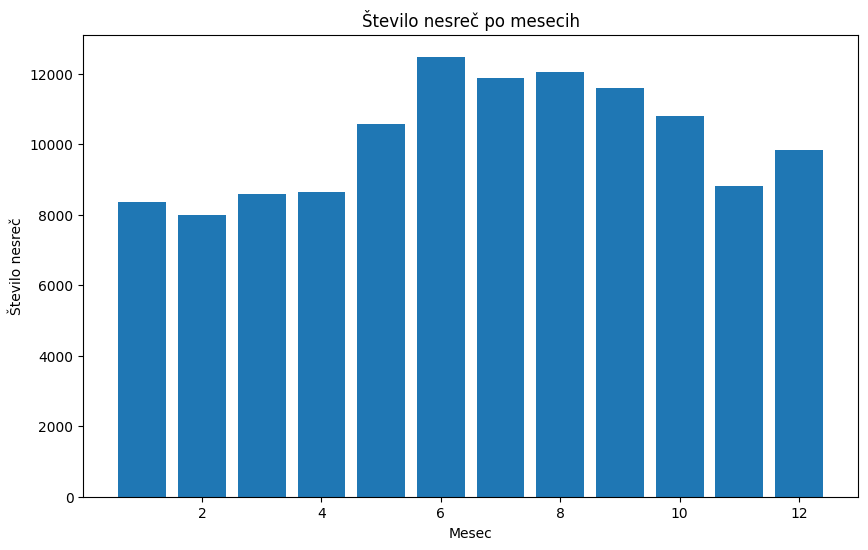

In [6]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_month.index, accidents_per_month.values)

plt.xlabel('Mesec')
plt.ylabel('Število nesreč')
plt.title('Število nesreč po mesecih')

plt.show()

# **Resnost posledic prometnih nesreč**

Tri kategorije nesreč:
- **Nesreče brez poškodovancev**: udeleženci niso bili poškodovani in nihče ni umrl
- **Nesreče s poškodbami**: nekateri udeleženci so bili poškodovani, vendar nihče ni umrl
- **Nesreče s smrtnim izidom**: vsaj eden od udeležencev je umrl (v nesreči so bili lahko tudi drugi, ki so bili poškodovani, vendar take nesreče ne štejem v kategorijo "Nesreče s poškodbami")

## Nesreče brez poškodovancev

In [7]:
# Nesreče brez poškodovancev in smrtnih žrtev
mild_accidents_entries = data[(data['LjudjeMrtvi'] == 0) & (data['LjudjePoskodovani'] == 0)]

# Za vsak vnos pridobi mesec nesreče
mild_months = mild_accidents_entries['NastanekDatumCas'].dt.month

mild_accidents_per_month = mild_months.value_counts().sort_index()

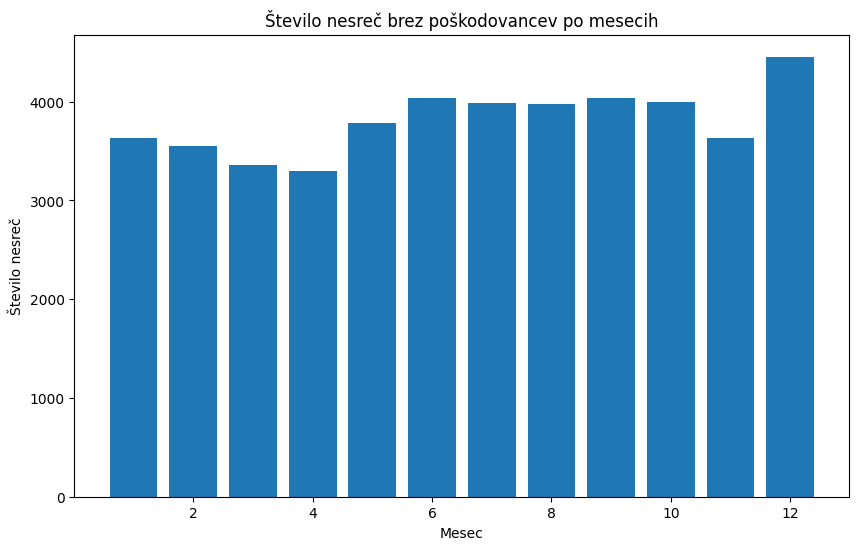

In [8]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(mild_accidents_per_month.index, mild_accidents_per_month.values)

plt.xlabel('Mesec')
plt.ylabel('Število nesreč')
plt.title('Število nesreč brez poškodovancev po mesecih')

plt.show()

## Nesreče s poškodbami

In [9]:
# Nesreče s poškodbami
injury_accidents_entries = data[(data['LjudjeMrtvi'] == 0) & (data['LjudjePoskodovani'] != 0)]

# Za vsak vnos pridobi mesec nesreče
injury_months = injury_accidents_entries['NastanekDatumCas'].dt.month

injury_accidents_per_month = injury_months.value_counts().sort_index()

Text(0.5, 1.0, 'Število nesreč s poškodbami po mesecih')

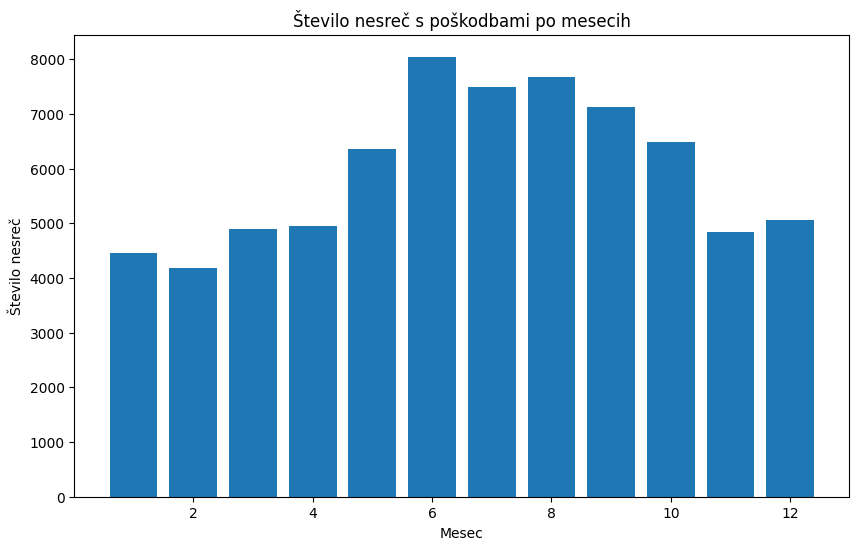

In [10]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(injury_accidents_per_month.index, injury_accidents_per_month.values)

plt.xlabel('Mesec')
plt.ylabel('Število nesreč')
plt.title('Število nesreč s poškodbami po mesecih')

## Nesreče s smrtnim izidom

In [11]:
# Nesreče s smrtnimi žrtvami
death_accidents_entries = data[(data['LjudjeMrtvi'] != 0)]

# Za vsak vnos pridobi mesec nesreče
death_months = death_accidents_entries['NastanekDatumCas'].dt.month

death_accidents_per_month = death_months.value_counts().sort_index()

Text(0.5, 1.0, 'Število nesreč s smrtnimi žrtvami po mesecih')

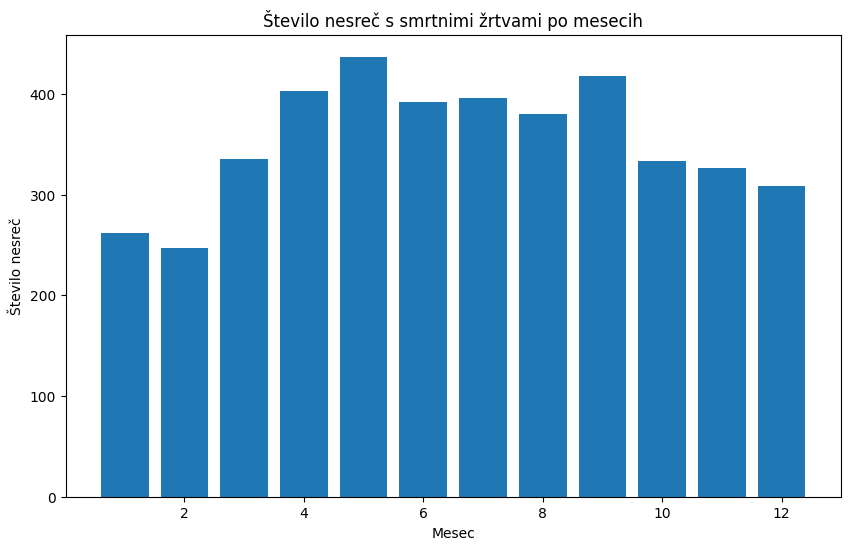

In [12]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(death_accidents_per_month.index, death_accidents_per_month.values)

plt.xlabel('Mesec')
plt.ylabel('Število nesreč')
plt.title('Število nesreč s smrtnimi žrtvami po mesecih')

## Prikaz števila vseh treh kategorij nesreč

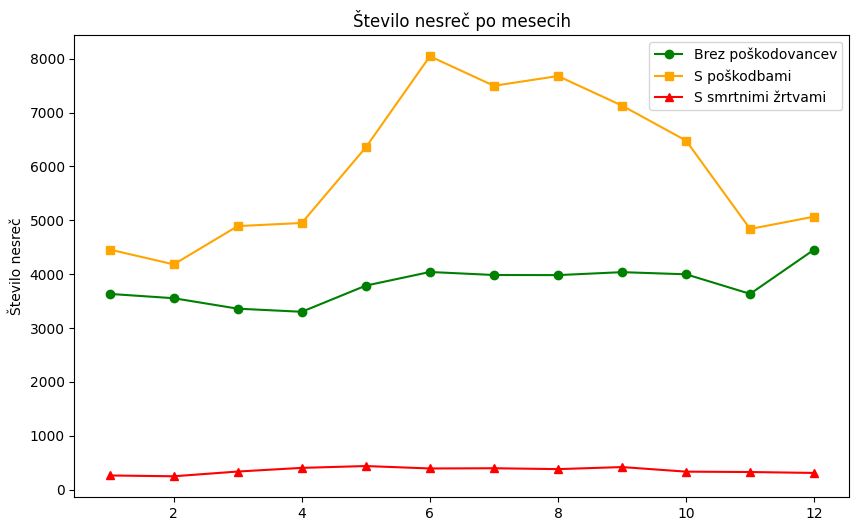

In [13]:
plt.figure(figsize=(10, 6))

plt.plot(mild_accidents_per_month.index, mild_accidents_per_month.values, marker='o', linestyle='-', label='Brez poškodovancev', color='green')
plt.plot(mild_accidents_per_month.index, injury_accidents_per_month.values, marker='s', linestyle='-', label='S poškodbami', color='orange')
plt.plot(mild_accidents_per_month.index, death_accidents_per_month.values, marker='^', linestyle='-', label='S smrtnimi žrtvami', color='red')

plt.ylabel('Število nesreč')
plt.title('Število nesreč po mesecih')
plt.legend()

plt.show()

## Prikaz normaliziranih vrednosti za lažjo primerjavo

X_norm = (X - X_min) / (X_max - X_min)

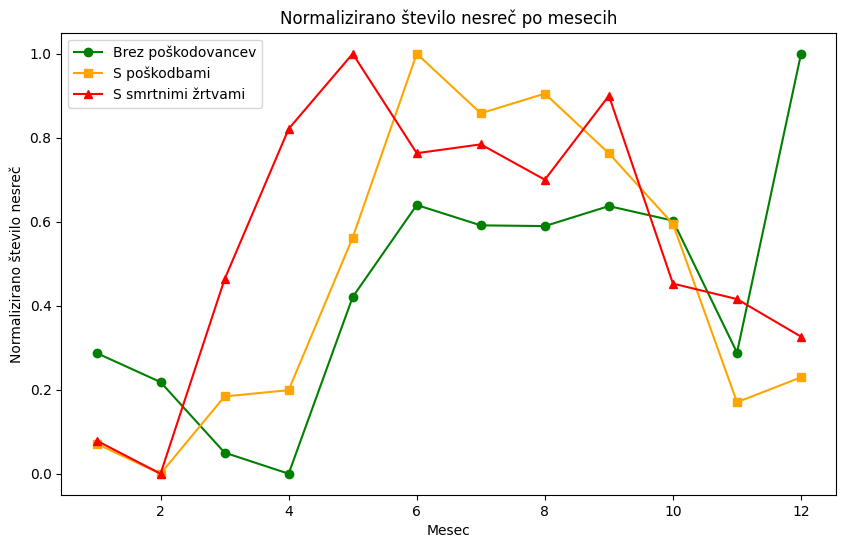

In [14]:
# Normaliziranje
mild_norm = (mild_accidents_per_month.values - np.min(mild_accidents_per_month.values)) / (np.max(mild_accidents_per_month.values) - np.min(mild_accidents_per_month.values))
injury_norm = (injury_accidents_per_month.values - np.min(injury_accidents_per_month.values)) / (np.max(injury_accidents_per_month.values) - np.min(injury_accidents_per_month.values))
death_norm = (death_accidents_per_month.values - np.min(death_accidents_per_month.values)) / (np.max(death_accidents_per_month.values) - np.min(death_accidents_per_month.values))

plt.figure(figsize=(10, 6))

plt.plot(mild_accidents_per_month.index, mild_norm, marker='o', linestyle='-', label='Brez poškodovancev', color='green')
plt.plot(mild_accidents_per_month.index, injury_norm, marker='s', linestyle='-', label='S poškodbami', color='orange')
plt.plot(mild_accidents_per_month.index, death_norm, marker='^', linestyle='-', label='S smrtnimi žrtvami', color='red')

plt.xlabel('Mesec')
plt.ylabel('Normalizirano število nesreč')
plt.title('Normalizirano število nesreč po mesecih')
plt.legend()

plt.show()

## Petkove nesreče s smrtnim izidom

V skripti `01_analiza_po_dnevih` sem opazila, da so petkove prometne nesreče s smrtnim izidom porazdeljene čez relativno majhno število petkov. Zato sem se odločila, da pogledam, v katerem mesecu so zgoščeni ti smrtonosni petki. Moje predvidevanje je bilo, da je to najbrž julija ali avgusta, saj so takrat poletne počitnice.

In [ ]:
# Za vsak vnos pridobi, kateri mesec je bil
data['weekday'] = data['NastanekDatumCas'].dt.weekday

fridays = data[data['weekday'] == 4]

# Nesreče s smrtnimi žrtvami
death_accidents_entries = fridays[(fridays['LjudjeMrtvi'] != 0)]

months_friday = death_accidents_entries['NastanekDatumCas'].dt.month

# Preštej število nesreč za vsak mesec
accidents_per_month_friday = months_friday.value_counts().sort_index()

#print(accidents_per_month_friday)

Text(0.5, 1.0, 'Število nesreč s smrtnimi žrtvami v petkih po mesecih')

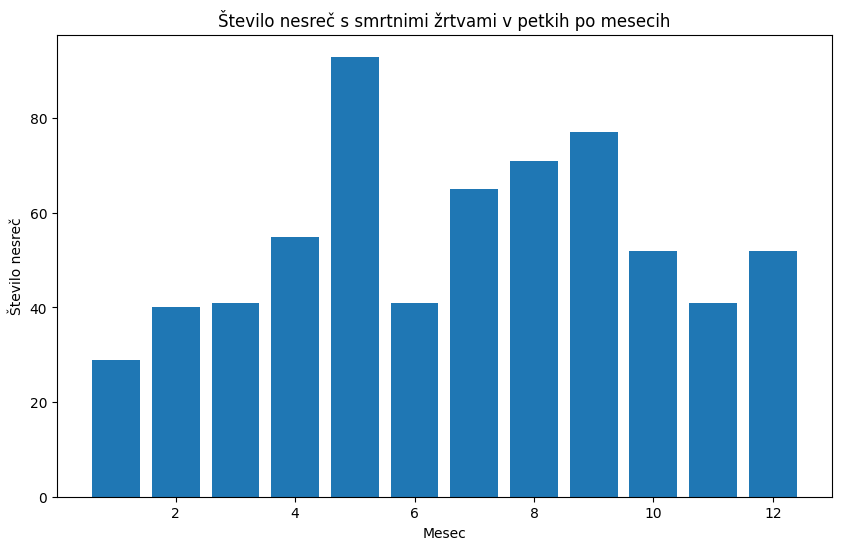

In [27]:
# Stolpčni diagram
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_month_friday.index, accidents_per_month_friday.values)

plt.xlabel('Mesec')
plt.ylabel('Število nesreč')
plt.title('Število nesreč s smrtnimi žrtvami v petkih po mesecih')

Moje predvidevanje je bilo napačno. Smrtonosni petki so zgoščeni v maju. Zanimivo. Nobena možna razlaga mi ne pade na pamet.